将所有细胞得分的topk细胞作为该性状相关的细胞，计算这些细胞与各个组织中细胞的富集情况

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os

import matplotlib.pyplot as plt
#战置全局字体大小为12
plt.rcParams['font.size'] = 14

import warnings
# 禁用所有警告
warnings.filterwarnings("ignore")

In [2]:
# 遍历文件夹中的指定格式的文件
def openFolderAll(folder_path,desired_extension):
    filelist = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path) and filename.endswith(desired_extension):
            filelist.append(file_path)
    return filelist

In [8]:
# core = "core"
# tissuelist = os.listdir(r"..\results\asthma\lcczscore-pip-coreperi\%s"%core)
# 
# results_ct = pd.DataFrame()
# for tissue in tissuelist:
#     folder_path = r"E:\0_单细胞1\results\asthma\lcczscore-pip-coreperi\%s\%s"%(core,tissue)
#     celltypelist = openFolderAll(folder_path,".csv")
# 
#     tissue_df = pd.DataFrame()
#     for ct in celltypelist:
#         celltype = ct.split("\\")[-1].split(".")[0]
#         df = pd.read_csv(ct)
#         df["celltype"] = celltype
#         tissue_df = tissue_df.append(df)
#     tissue_df["tissue"] = tissue
#     results_ct = results_ct.append(tissue_df)
# results_ct.to_csv(r"..\results\asthma\lcczscore-pip-coreperi\%s\allcells.csv"%core)
# print("finish!")

finish!


In [18]:
# # core = "peri"
# core = "core"
# index = "lcczscore"
# # index = "lcc_expresssum_zscore"
# # index = "lcc_expressmean_zscore"
# results_ct = pd.read_csv(r"..\results\asthma\lcczscore-pip-coreperi\%s\allcells.csv"%core)
# results_ct_sorted = results_ct.sort_values(by=index,ascending=False)
# results_ct_sorted_topk = results_ct_sorted.iloc[:int(len(results_ct_sorted) * (10 / 100))][[index,"tissue","celltype","cell"]]
# counts_df = pd.DataFrame(results_ct_sorted_topk['tissue'].value_counts())
# counts_df.columns = ["num of top10cell"]
# print(counts_df)
# counts_df.to_csv(r"..\results\asthma\trait-cells-in-tissues\tissues\%s\top10_%s.csv"%(core,index))

                 num of top10cell
Lung                         5663
Blood                        4053
Fat                          3844
Vasculature                  3771
Muscle                       3348
Salivary_Gland               2934
Bladder                      2904
Spleen                       2799
Thymus                       2595
Eye                          2251
Lymph_Node                   2036
Pancreas                     1732
Trachea                      1442
Heart                        1354
Tongue                       1322
Prostate                     1266
Bone_Marrow                  1175
Uterus                        994
Mammary                       944
Skin                          626
Small_Intestine               389
Large_Intestine               374
Liver                         302
Kidney                        197


计算Sørensen-Dice系数,Simpson系数,Cosine指数,Geometric指数

In [3]:
# import math
# 
# def dice_coefficient(set1, set2):
#     """
#     计算两个集合的Dice系数
#     :param set1: 第一个集合
#     :param set2: 第二个集合
#     :return: Dice系数
#     """
#     intersection = len(set1.intersection(set2))
#     return 2.0 * intersection / (len(set1) + len(set2))
# 
# def simpson_coefficient(set1, set2):
#     """
#     计算两个集合的Simpson系数
#     :param set1: 第一个集合
#     :param set2: 第二个集合
#     :return: Simpson系数
#     """
#     intersection = len(set1.intersection(set2))
#     return intersection / min(len(set1), len(set2))
# 
# def cosine_similarity(set1, set2):
#     """
#     计算两个集合的余弦相似度（Cosine指数）
#     :param set1: 第一个集合
#     :param set2: 第二个集合
#     :return: 余弦相似度
#     """
#     intersection = len(set1.intersection(set2))
#     magnitude_set1 = math.sqrt(len(set1))
#     magnitude_set2 = math.sqrt(len(set2))
#     return intersection / (magnitude_set1 * magnitude_set2)
# 
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [22]:
core = "peri"
# core = "core"
index = "lcczscore"
# index = "lcc_expresssum_zscore"
# index = "lcc_expressmean_zscore"
results_ct = pd.read_csv(r"E:\0_单细胞1\results\lcczscore-pip-coreperi\%s\allcells.csv"%core)
results_ct_sorted = results_ct.sort_values(by=index,ascending=False)
results_ct_sorted_topk = results_ct_sorted.iloc[:int(len(results_ct_sorted) * (10 / 100))][[index,"tissue","celltype","cell"]]
# 
# # 计算jaccard系数
# # set1 = set(list(results_ct_sorted_topk["cellname"]))
# tissuelist = os.listdir(r"..\results\lcczscore-pip-cell-sixpoints")
# result = []
# for tissue in tissuelist:
#     tissue_cells = set(list(results_ct[results_ct["tissue"]==tissue]["cell"]))
#     tissue_related_cells = set(results_ct_sorted_topk[results_ct_sorted_topk["tissue"]==tissue]["cell"])
# 
#     observed_similarity = jaccard_similarity(tissue_related_cells, tissue_cells)
#     observed_similarity1 = dice_coefficient(tissue_related_cells, tissue_cells)
#     observed_similarity2 = simpson_coefficient(tissue_related_cells, tissue_cells)
#     observed_similarity4 = cosine_similarity(tissue_related_cells, tissue_cells)
#     result.append([tissue,len(tissue_cells),len(tissue_related_cells),observed_similarity,observed_similarity1,observed_similarity2,observed_similarity4])
# print(pd.DataFrame(result))

                  0      1     2         3         4    5         6
0           Bladder  24583  2212  0.089981  0.165105  1.0  0.299968
1             Blood  50115  6581  0.131318  0.232150  1.0  0.362378
2       Bone_Marrow  12297  2156  0.175327  0.298346  1.0  0.418721
3               Eye  10650   890  0.083568  0.154246  1.0  0.289081
4               Fat  20263  2714  0.133939  0.236236  1.0  0.365976
5             Heart  11505  1431  0.124381  0.221243  1.0  0.352676
6            Kidney   9641   428  0.044394  0.085013  1.0  0.210698
7   Large_Intestine  13680   919  0.067178  0.125899  1.0  0.259188
8             Liver   5007   584  0.116637  0.208907  1.0  0.341521
9              Lung  35682  6058  0.169777  0.290273  1.0  0.412041
10       Lymph_Node  53275  2967  0.055692  0.105508  1.0  0.235992
11          Mammary  11375   468  0.041143  0.079034  1.0  0.202837
12           Muscle  30746  1856  0.060366  0.113858  1.0  0.245694
13         Pancreas  13497  1834  0.135882  0.23

计算jaccard系数的经验pvalue

In [44]:
#从所有细胞中随机抽取1000次10%数量的细胞
sampled_cells_list = []
for i in range(10000):
    sampled_cells = set(list(results_ct_sorted.sample(frac=0.1)["cellname"]))
    sampled_cells_list.append(sampled_cells)
    if (i/200 == 0) :
        print(i)
print("finish")

# 重复10000次，计算jaccard系数的经验pvalue
set1 = set(list(results_ct_sorted_topk["cellname"]))
tissuelist = os.listdir(r"..\results\lcczscore-pip-cell-sixpoints")
for tissue in tissuelist:
    tissue_df = pd.read_csv(r"..\results\lcczscore-pip-cell-sixpoints-tissue\%s.csv"%tissue)
    tissue_cells = set(list(tissue_df["cellname"]))
    observed_similarity = jaccard_similarity(set1, tissue_cells)
    permuted_similarities = []
    # 计算经验pvalue
    for sampled in sampled_cells_list:
        permuted_similarity  = jaccard_similarity(sampled, tissue_cells)
        permuted_similarities.append(permuted_similarity)
    p_value = (np.sum(np.array(permuted_similarities) >= observed_similarity) + 1) / (10000 + 1)

    print(tissue)
    print("观察到的 Jaccard 相关系数:", observed_similarity)
    print(tissue," 经验 p 值: ", p_value)

0



KeyboardInterrupt



In [32]:
# 计算超几何分布pvalue
from scipy.stats import hypergeom
# Fisher's 精确检验
import numpy as np
from scipy.stats import fisher_exact

core = "peri"
# core = "core"
index = "lcczscore"
# index = "lcc_expresssum_zscore"
# index = "lcc_expressmean_zscore"
results_ct = pd.read_csv(r"E:\0_单细胞1\results\lcczscore-pip-coreperi\%s\allcells.csv"%core)
results_ct_sorted = results_ct.sort_values(by=index,ascending=False)
results_ct_sorted_topk_df = results_ct_sorted.iloc[:int(len(results_ct_sorted) * (10 / 100))][[index,"tissue","celltype","cell"]]

#  计算超几何分布pvalue
topkcells = set(list(results_ct_sorted_topk["cell"]))
tissuelist = os.listdir(r"..\results\lcczscore-pip-cell-sixpoints")
result_index = []
for tissue in tissuelist:
    tissue_cell = results_ct[results_ct['tissue']==tissue]
    tissue_cell_topk = results_ct_sorted_topk_df[results_ct_sorted_topk_df['tissue']==tissue]
    tissue_cellnum = len(tissue_cell)
    tissue_cellnum_topk = len(tissue_cell_topk)

    # 计算jaccard系数
    jaccard = jaccard_similarity(set(tissue_cell["cell"]),set(tissue_cell_topk["cell"]))

    # 计算fisher精确检验pvalue
    b = tissue_cellnum
    a = tissue_cellnum_topk
    observed_table = [[a, b-a], [np.floor(b/10), b - np.floor(b/10)]]  # 2x2 列联表数据
    odds_ratio, p_value = fisher_exact(observed_table, alternative='greater')

    # 所有细胞M中与性状相关的细胞有N个，那么某个组织的n个细胞中有k个性状相关细胞是否显著高
    M = len(allcells_result_df)
    N = len(results_ct_sorted_topk_df)
    n = tissue_cellnum
    k = tissue_cellnum_topk
    Hpvalue = hypergeom.sf(k-1,M,N,n)

    result_index.append([tissue,tissue_cellnum,tissue_cellnum_topk,
                   jaccard,p_value,Hpvalue])
result_index_df = pd.DataFrame(result_index)
result_index_df.columns = ["tissue","cellnum","relatedCellnum","jaccard","fisher's pvalue","hypergeom pvalue"]
result_index_df.to_csv(r"E:\00_CeSOP\results\asthma\trait-cells-in-tissues\tissues\top10_%s_lcczscore.csv"%core)
result_index_df

,tissue,cellnum,relatedCellnum,jaccard,fisher's pvalue,hypergeom pvalue
0,Bladder,24583,2212,0.089981,9.999277e-01,1.000000e+00
1,Blood,50115,6581,0.131318,1.320988e-54,2.184364e-125
2,Bone_Marrow,12297,2156,0.175327,7.396689e-67,1.238898e-147
3,Eye,10650,890,0.083568,9.999854e-01,1.000000e+00
4,Fat,20263,2714,0.133939,1.020943e-26,3.302498e-56
5,Heart,11505,1431,0.124381,2.396460e-09,7.310832e-18
6,Kidney,9641,428,0.044394,1.000000e+00,1.000000e+00
7,Large_Intestine,13680,919,0.067178,1.000000e+00,1.000000e+00
8,Liver,5007,584,0.116637,3.786074e-03,6.198245e-05
9,Lung,35682,6058,0.169777,1.038489e-165,0.000000e+00


## 细胞类型

In [44]:
# # 相关细胞数量
# # core = "peri"
# core = "core"
# index = "lcczscore"
# # index = "lcc_expresssum_zscore"
# # index = "lcc_expressmean_zscore"
# allcells_result_df = pd.read_csv(r"E:\00_CeSOP\results\asthma\lcczscore-pip-coreperi\%s\allcells.csv"%core)
# results_ct_sorted = allcells_result_df.sort_values(by=index,ascending=False)
# results_ct_sorted_topk = results_ct_sorted.iloc[:int(len(results_ct_sorted) * (10 / 100))][[index,"tissue","celltype","cell"]]
# 
# ## 性状相关细胞数量
# results_ct_topk_counts = results_ct_sorted_topk.groupby(["tissue",'celltype']).size().reset_index(name='Relatedcellnum')
# results_ct_counts = results_ct_sorted.groupby(["tissue",'celltype']).size().reset_index(name='cellnum')
# 
# # 使用 merge 函数将两个 DataFrame 合并
# merged_df = pd.merge(results_ct_counts, results_ct_topk_counts, on=['tissue','celltype'], how='left')
# # 使用 fillna 方法将缺失的值填充为 0
# merged_df.fillna(0, inplace=True)
# merged_df.to_csv(r"temp.csv")

In [42]:
# merged_df

,tissue,celltype,cellnum,Relatedcellnum
0,Bladder,b cell,253,23.0
1,Bladder,bladder urothelial cell,4151,604.0
2,Bladder,capillary endothelial cell,77,19.0
3,Bladder,endothelial cell of lymphatic vessel,74,10.0
4,Bladder,fibroblast,5557,364.0
...,...,...,...,...
469,Vasculature,nk cell,121,11.0
470,Vasculature,pericyte cell,1193,207.0
471,Vasculature,plasma cell,42,8.0
472,Vasculature,smooth muscle cell,3075,490.0


计算jaccard系数和超几何分布pvalue

In [9]:
# 计算超几何分布pvalue
from scipy.stats import hypergeom
# Fisher's 精确检验
import numpy as np
from scipy.stats import fisher_exact

core = "peri"
# core = "core"
index = "lcczscore"
# index = "lcc_expresssum_zscore"
# index = "lcc_expressmean_zscore"

results_ct = pd.read_csv(r"E:\00_CeSOP\results\asthma\lcczscore-pip-coreperi\%s\allcells.csv"%core)
results_ct_sorted = results_ct.sort_values(by=index,ascending=False)
results_ct_sorted_topk = results_ct_sorted.iloc[:int(len(results_ct_sorted) * (10 / 100))][[index,"tissue","celltype","cell"]]
# 计算jaccard系数
result = []

tissue_ct = results_ct_sorted.groupby(["tissue",'celltype'])
for group_name, group_data in tissue_ct:
    ct_cells = set(list(results_ct_sorted[(results_ct_sorted["tissue"]==group_name[0]) & (results_ct_sorted["celltype"]==group_name[1])]["cell"]))
    ct_cells_num = len(ct_cells)
    topkcells = set(list(results_ct_sorted_topk[(results_ct_sorted_topk["tissue"]==group_name[0]) & (results_ct_sorted_topk["celltype"]==group_name[1])]["cell"]))
    topkcells_num = len(topkcells)
    if topkcells_num==0:
        observed_similarity = 0
        p_value = 1
        Hpvalue = 1
    else :
        # Jaccard 相关系数
        observed_similarity = jaccard_similarity(topkcells, ct_cells)

        # 计算fisher精确检验pvalue
        b = ct_cells_num
        a = topkcells_num
        observed_table = [[a, b-a], [np.floor(b/10), b - np.floor(b/10)]]  # 2x2 列联表数据
        odds_ratio, p_value = fisher_exact(observed_table, alternative='greater')

        # 超几何检验pvalue
        # 所有细胞M中与性状相关的细胞有N个，那么某个细胞类型的n个细胞中有k个性状相关细胞是否显著高
        M = len((results_ct["cell"]))
        N = len(topkcells)
        n = len(ct_cells)
        k = len(topkcells & ct_cells)
        Hpvalue = hypergeom.sf(k-1,M,N,n)

    result.append([group_name[0],group_name[1],ct_cells_num,topkcells_num,observed_similarity,p_value,Hpvalue])
result_df = pd.DataFrame(result)
result_df.columns = ["tissue","celltype","cellnum","relatedCellnum","jaccard","fisher's pvalue","hypergeom pvalue"]
result_df.to_csv(r"E:\00_CeSOP\results\asthma\trait-cells-in-tissues-and-celltypes\celltypes\top10_%s_%s.csv"%(core,index))

## 可视化

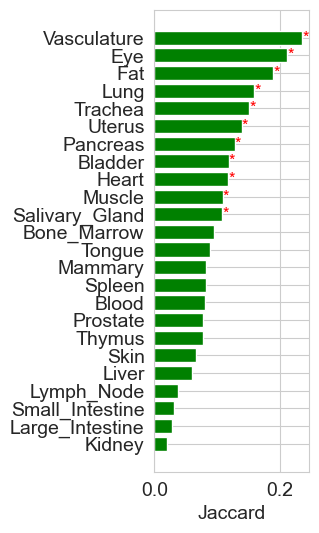

In [12]:
import matplotlib.pyplot as plt
core = "core"
# core = "peri"
df = pd.read_csv(r"E:\00_CeSOP\results\asthma\trait-cells-in-tissues-and-celltypes\tissues\top10_%s_lcczscore.csv"%core)
df2 = df.sort_values(by = "jaccard")
fig = plt.figure(figsize=(2,6))
plt.barh(df2["tissue"], df2["jaccard"],color = "green")
# plt.barh(df2["tissue"], df2["jaccard"],color = "green",alpha = 0.2)

plt.xlabel("Jaccard")
# 添加星号
for i, value in enumerate(list(df2["jaccard"])):
    # print(df2[df2["jaccard"]==value]["fisher's pvalue"].values[0])
    if df2[df2["jaccard"]==value]["fisher's pvalue"].values[0] < 0.005:
        plt.text(value, i, "*", color='red', fontsize=12, va='center')
# plt.axvline(x=0.005, color='green', linestyle='--')
plt.show()